In [1]:
import os , sys
datapath   = "..\\"
print('datapath is set to %s'%datapath)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
#from Loobos_Toolbox import Read_LoobosEddFinal, Read_LooStor, Read_LoodatGapfill, Read_Loobos_halfhourly, Read_Loobos_meteo, Read_Loobos_soil, Read_Loobos_profile
#from Loobos_Toolbox_Dendro_Grwater

datapath is set to ..\


In [2]:
#my own functions
from Loobos_Toolbox_Dendro_Grwater import Read_Dendrometers,notmatch

## Import Dendrometer data

### populate dataframes

In [3]:
## function to import all dendro data and append it to the other data
df_dendro_I5 = pd.read_csv(datapath+'Loobos_dendrometers\I5.csv',sep=",",index_col=False)
df_dendro_I5['datetime']=pd.to_datetime(df_dendro_I5['groeiseizoen'], format= '%m-%d %H:%M')
df_dendro_I5.index = df_dendro_I5['datetime']

df_dendro_K9 = pd.read_csv(datapath+'Loobos_dendrometers\K9.csv',sep=",",index_col=False)
df_dendro_K9['datetime']=pd.to_datetime(df_dendro_K9['groeiseizoen'], format= '%m-%d %H:%M')
df_dendro_K9.index = df_dendro_K9['datetime']

### visual check dataframes

In [49]:
df_dendro_I5

,groeiseizoen,jr2008,jr2010,jr2011,jr2012,jr2013,jr2014,jr2015,jr2016,jr2017,jr2018,jr2019,jr2020,jr2021,jr2022,datetime
datetime,,,,,,,,,,,,,,,,
1900-04-01 00:00:00,04-01 00:00,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1900-04-01 00:00:00
1900-04-01 01:00:00,04-01 01:00,-0.000969,0.00097,0.00581,0.00097,0.00193,0.00194,0.00872,-0.00484,0.00290,0.00290,-0.00097,-0.00097,0.00000,0.05809,1900-04-01 01:00:00
1900-04-01 02:00:00,04-01 02:00,-0.000969,0.01937,0.02034,0.00387,0.00290,0.00291,0.00388,-0.00291,0.00581,0.00871,-0.00387,-0.00484,0.00194,0.08715,1900-04-01 02:00:00
1900-04-01 03:00:00,04-01 03:00,-0.000969,0.02131,0.03002,0.00484,0.00290,0.00291,0.00291,-0.00291,0.00290,0.01451,-0.00774,-0.00194,0.00290,0.11523,1900-04-01 03:00:00
1900-04-01 04:00:00,04-01 04:00,0.000968,0.02034,0.03583,0.00581,0.00193,0.00388,0.01646,-0.00291,-0.00097,0.02614,-0.00968,0.00581,0.00484,0.24692,1900-04-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-09-30 20:00:00,09-30 20:00,4.765185,7.83966,NaN,7.96167,6.22931,7.47055,4.49737,4.97047,5.45640,3.08705,7.68086,8.54849,8.39065,6.88198,1900-09-30 20:00:00
1900-09-30 21:00:00,09-30 21:00,4.804895,7.85225,NaN,7.96070,6.22738,7.47442,4.49544,4.97338,5.46221,3.08609,7.68086,8.55042,8.39161,6.88488,1900-09-30 21:00:00
1900-09-30 22:00:00,09-30 22:00,4.884295,7.86000,NaN,7.96264,6.22834,7.48023,4.49544,4.97435,5.45931,3.08899,7.68183,8.55235,8.39065,6.88678,1900-09-30 22:00:00


In [51]:
df_dendro_K9

,groeiseizoen,jr2009,jr2010,jr2011,jr2015,jr2018,datetime
datetime,,,,,,,
1900-04-01 00:00:00,04-01 00:00,0.000000,0.00000,0.00000,0.00000,0.00000,1900-04-01 00:00:00
1900-04-01 01:00:00,04-01 01:00,0.000000,0.01937,0.00581,0.00000,0.00097,1900-04-01 01:00:00
1900-04-01 02:00:00,04-01 02:00,0.001936,0.02905,0.02034,0.00194,0.00000,1900-04-01 02:00:00
1900-04-01 03:00:00,04-01 03:00,0.002904,0.03777,0.03002,-0.00581,0.00000,1900-04-01 03:00:00
1900-04-01 04:00:00,04-01 04:00,0.004841,0.04842,0.03583,0.00581,0.00000,1900-04-01 04:00:00
...,...,...,...,...,...,...,...
1900-09-30 20:00:00,09-30 20:00,3.612865,6.88972,NaN,NaN,0.12104,1900-09-30 20:00:00
1900-09-30 21:00:00,09-30 21:00,3.615775,6.89263,NaN,NaN,0.12298,1900-09-30 21:00:00
1900-09-30 22:00:00,09-30 22:00,3.618675,6.89941,NaN,NaN,0.12298,1900-09-30 22:00:00


## Plot multiple years of dendrometer growth

In [4]:
import matplotlib.dates as mdates


In [34]:
# quick resample
#df_dendro_I5=df_dendro_I5.resample('1D').mean()
#df_dendro_O3=df_dendro_O3.resample('1D').mean()

### 2008-2011

In [5]:
plt.rcParams["figure.figsize"] = (18,8)

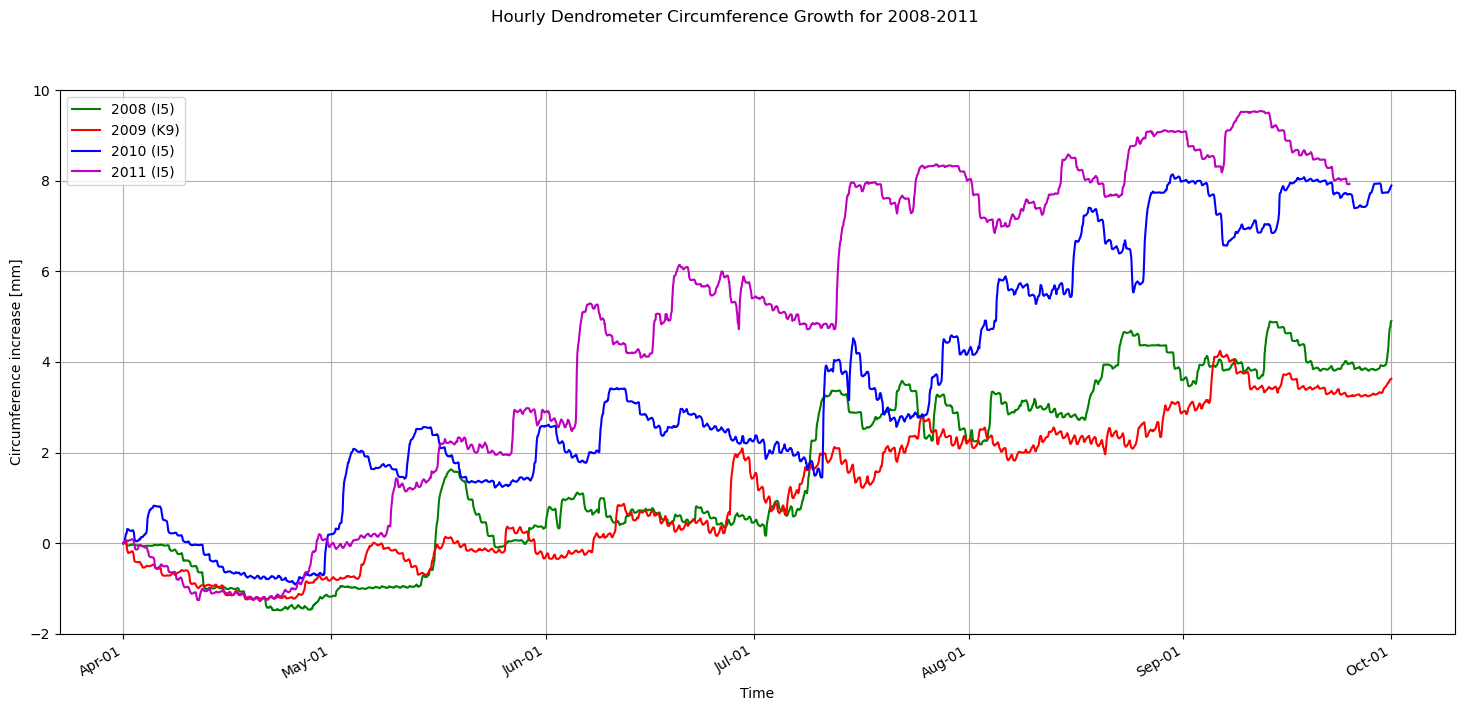

In [6]:
fig,ax=plt.subplots() #put this inside the brackets constrained_layout=True
#fig.subplots_adjust(right=0.75)

#plot values
p1, = ax.plot(df_dendro_I5['jr2008'], "g-", label="2008")
p2, = ax.plot(df_dendro_K9['jr2009'], "r-", label="2009")
p3, = ax.plot(df_dendro_I5['jr2010'], "b-", label="2010")
p4, = ax.plot(df_dendro_I5['jr2011'], "m-", label="2011")

#x tick date formatting
myFmt = mdates.DateFormatter('%b-%d') #%b is month name, short. %B is month name, full.
ax.xaxis.set_major_formatter(myFmt)
    
ax.set_ylim(-2,10)
        
#set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Circumference increase [mm]")
#ax.xaxis.set_ticks(pd.date_range(start=time_start, end=time_end, freq='1M'))

#color the yaxis labels
#ax.yaxis.label.set_color('black')
#color the rest of the yaxis lines and ticks
#tkw = dict(size=4, width=1.5)
#ax.tick_params(axis='y', colors='black', **tkw)
#ax.tick_params(axis='x', **tkw)
fig.suptitle('Hourly Dendrometer Circumference Growth for 2008-2011')
    
fig.autofmt_xdate() #allows you to auto-align the x axis labels

ax.legend(handles=[p1, p2, p3 ,p4],labels=['2008 (I5)','2009 (K9)','2010 (I5)','2011 (I5)'], loc='upper left')

plt.grid()
plt.show()

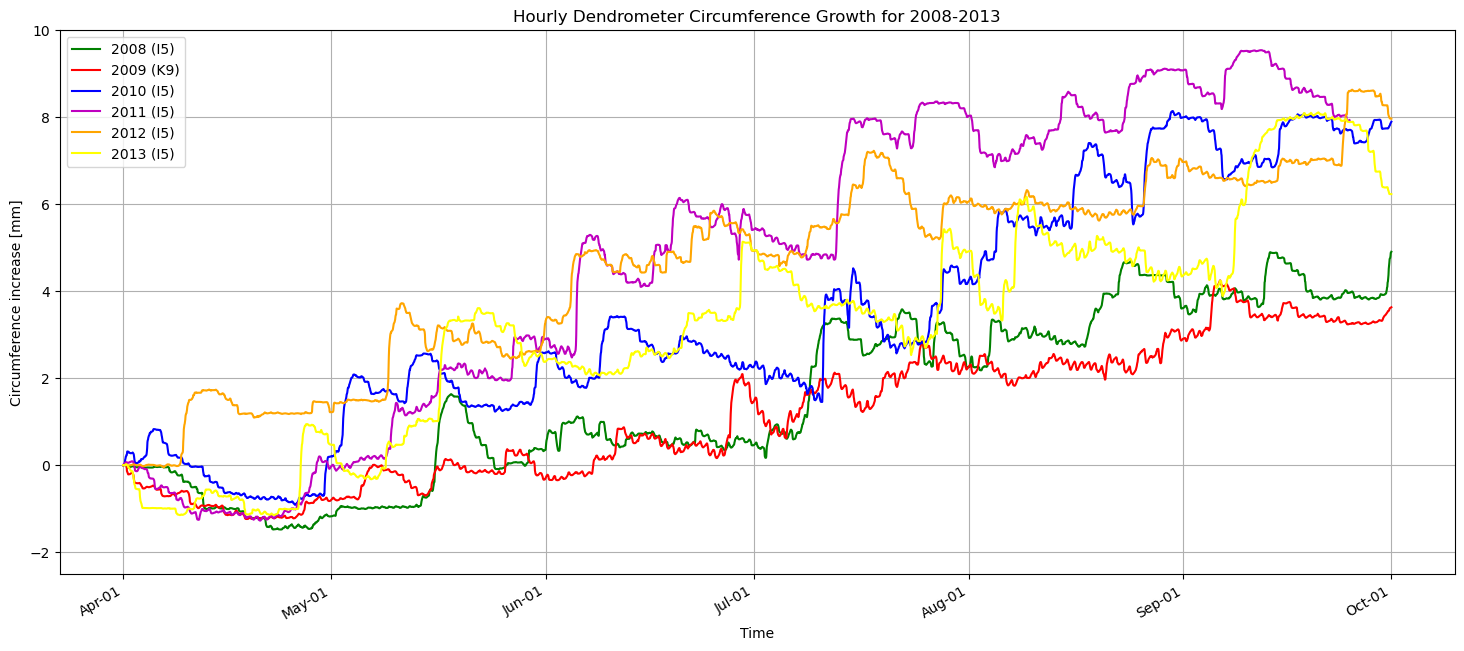

In [27]:
fig,ax=plt.subplots() #put this inside the brackets constrained_layout=True
#fig.subplots_adjust(right=0.75)

#plot values
p1, = ax.plot(df_dendro_I5['jr2008'], "g-", label="2008")
p2, = ax.plot(df_dendro_K9['jr2009'], "r-", label="2009")
p3, = ax.plot(df_dendro_I5['jr2010'], "b-", label="2010")
p4, = ax.plot(df_dendro_I5['jr2011'], "m-", label="2011")
p5, = ax.plot(df_dendro_I5['jr2012'], "orange", label="2012")
p6, = ax.plot(df_dendro_I5['jr2013'], "yellow", label="2013")

#x tick date formatting
myFmt = mdates.DateFormatter('%b-%d') #%b is month name, short. %B is month name, full.
ax.xaxis.set_major_formatter(myFmt)
    
ax.set_ylim(-2.5,10)
        
#set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Circumference increase [mm]")
#ax.xaxis.set_ticks(pd.date_range(start=time_start, end=time_end, freq='1M'))

#color the yaxis labels
#ax.yaxis.label.set_color('black')
#color the rest of the yaxis lines and ticks
#tkw = dict(size=4, width=1.5)
#ax.tick_params(axis='y', colors='black', **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title('Hourly Dendrometer Circumference Growth for 2008-2013')
    
fig.autofmt_xdate() #allows you to auto-align the x axis labels

ax.legend(handles=[p1, p2, p3 ,p4,p5,p6],labels=['2008 (I5)','2009 (K9)','2010 (I5)','2011 (I5)','2012 (I5)','2013 (I5)'], loc='upper left')

plt.grid()
plt.show()

### 2012-2015

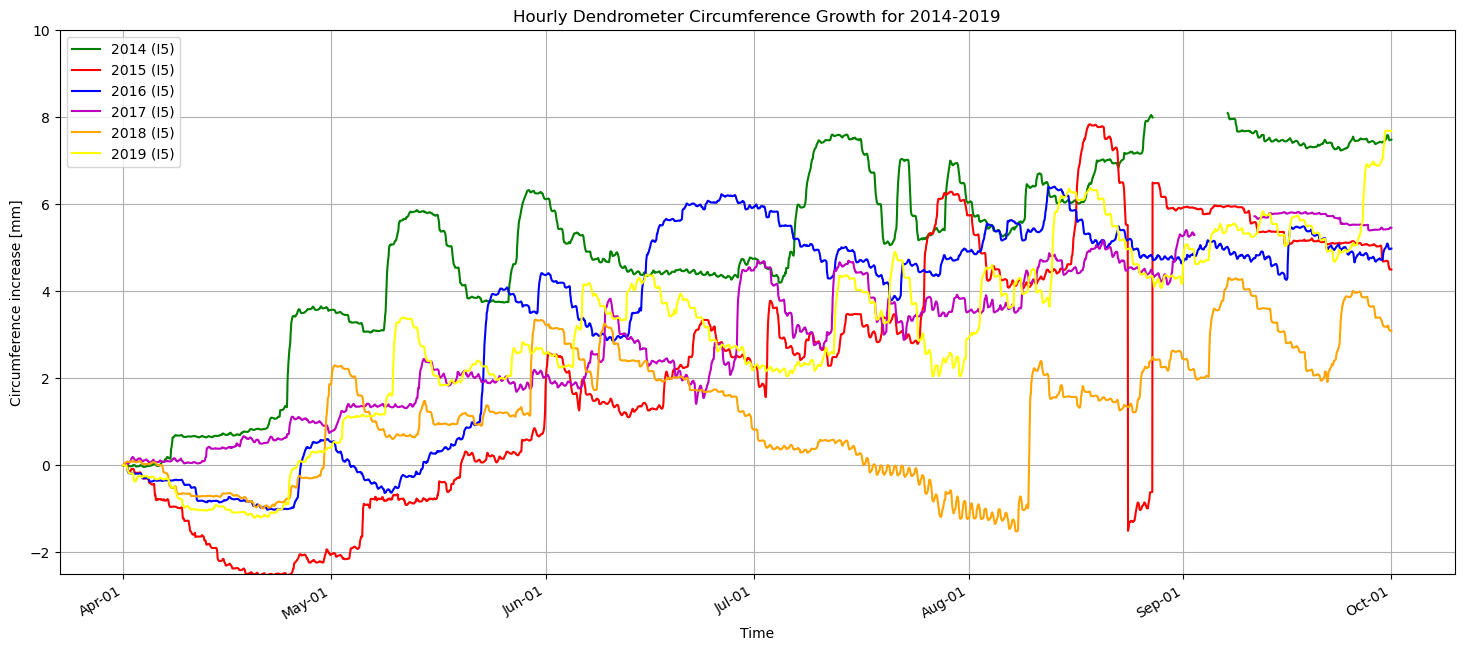

In [25]:
fig,ax=plt.subplots() #put this inside the brackets constrained_layout=True
#fig.subplots_adjust(right=0.75)

#plot values

p1, = ax.plot(df_dendro_I5['jr2014'], "g-", label="2014")
p2, = ax.plot(df_dendro_I5['jr2015'], "r-", label="2015")
p3, = ax.plot(df_dendro_I5['jr2016'], "b-", label="2016")
p4, = ax.plot(df_dendro_I5['jr2017'], "m-", label="2017")
p5, = ax.plot(df_dendro_I5['jr2018'], "orange", label="2018")
p6, = ax.plot(df_dendro_I5['jr2019'], "yellow", label="2019")

#x tick date formatting
myFmt = mdates.DateFormatter('%b-%d') #%b is month name, short. %B is month name, full.
ax.xaxis.set_major_formatter(myFmt)
    
ax.set_ylim(-2.5,10)
        
#set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Circumference increase [mm]")
#ax.xaxis.set_ticks(pd.date_range(start=time_start, end=time_end, freq='1M'))

#color the yaxis labels
#ax.yaxis.label.set_color('black')
#color the rest of the yaxis lines and ticks
#tkw = dict(size=4, width=1.5)
#ax.tick_params(axis='y', colors='black', **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title('Hourly Dendrometer Circumference Growth for 2014-2019')
    
fig.autofmt_xdate() #allows you to auto-align the x axis labels

ax.legend(handles=[p1, p2, p3 ,p4,p5,p6],labels=['2014 (I5)','2015 (I5)','2016 (I5)','2017 (I5)','2018 (I5)','2019 (I5)'],loc='upper left')

plt.grid()
plt.show()

## All years

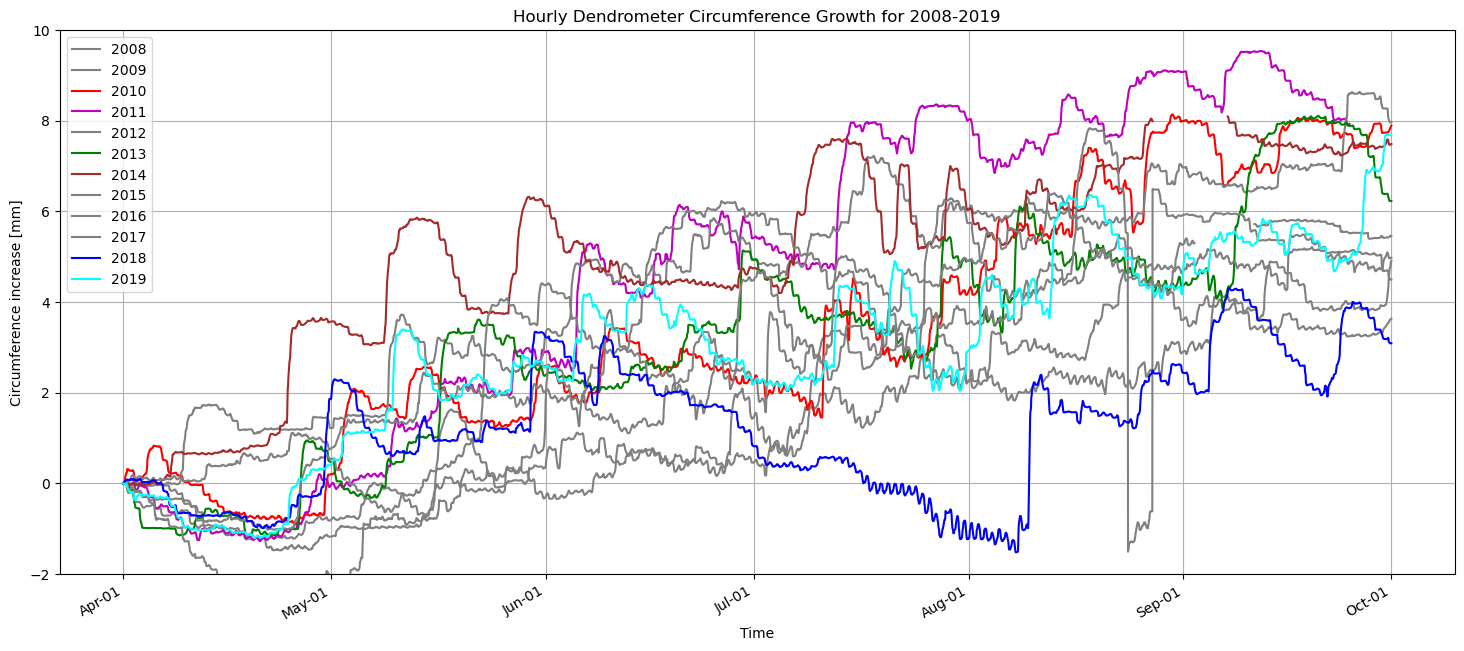

In [19]:
fig,ax=plt.subplots() #put this inside the brackets constrained_layout=True
#fig.subplots_adjust(right=0.75)

#plot values
p1, = ax.plot(df_dendro_I5['jr2008'], "grey", label="2008")
p2, = ax.plot(df_dendro_K9['jr2009'], "grey", label="2009")
p3, = ax.plot(df_dendro_I5['jr2010'], "r-", label="2010")
p4, = ax.plot(df_dendro_I5['jr2011'], "m-", label="2011")
p5, = ax.plot(df_dendro_I5['jr2012'], "grey", label="2012")
p6, = ax.plot(df_dendro_I5['jr2013'], "g-", label="2013")
p7, = ax.plot(df_dendro_I5['jr2014'], "brown", label="2014")
p8, = ax.plot(df_dendro_I5['jr2015'], "grey", label="2015")
p9, = ax.plot(df_dendro_I5['jr2016'], "grey", label="2016")
p10, = ax.plot(df_dendro_I5['jr2017'], "grey", label="2017")
p11, = ax.plot(df_dendro_I5['jr2018'], "b-", label="2018")
p12, = ax.plot(df_dendro_I5['jr2019'], "cyan", label="2019")


#x tick date formatting
myFmt = mdates.DateFormatter('%b-%d') #%b is month name, short. %B is month name, full.
ax.xaxis.set_major_formatter(myFmt)
    
ax.set_ylim(-2,10)
        
#set axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Circumference increase [mm]")
#ax.xaxis.set_ticks(pd.date_range(start=time_start, end=time_end, freq='1M'))

#color the yaxis labels
#ax.yaxis.label.set_color('black')
#color the rest of the yaxis lines and ticks
#tkw = dict(size=4, width=1.5)
#ax.tick_params(axis='y', colors='black', **tkw)
#ax.tick_params(axis='x', **tkw)
ax.set_title('Hourly Dendrometer Circumference Growth for 2008-2019')
    
fig.autofmt_xdate() #allows you to auto-align the x axis labels

ax.legend(loc='upper left') 
plt.grid()
plt.show()